In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
# [1(beta_0), 친구수, 근무시간, 박사학위 취득 여부]
X = [[1,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]

# 사이트에서 보내는 시간(분)
Y = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [3]:
X = np.array(X)
Y = np.array(Y)

# 선형회귀 기초

- 예제 데이터 활용 
    - X : [1, 친구수, 근무시간, 박사학위 취득여부]
    - Y : 웹사이트에서 보내는 시간 
- ### $ Y = Xw $
- ### $w^ *=(X^TX)^ { -1} X^ Ty$

### (1) numpy를 이용한 선형회귀 분석

In [6]:
# 최적 가중치 벡터를 구한다.

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
w

array([30.57901812,  0.97250518, -1.86503639,  0.9232007 ])

In [7]:
# 예측값 연산

y_predicted = np.dot(X, w)

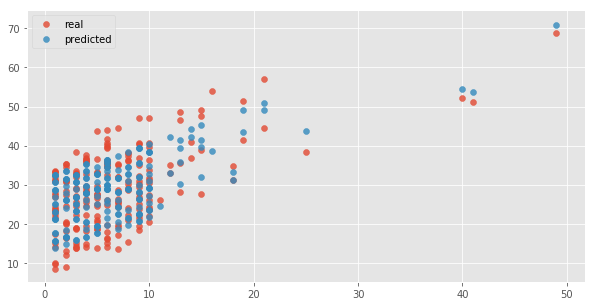

In [8]:
## 시각화

plt.figure(figsize = (10, 5))
plt.scatter(X[:, 1], Y, label = 'real', alpha = 0.8)
plt.scatter(X[:, 1], y_predicted, label = 'predicted', alpha = 0.8) ## 
plt.legend()

### (2) sklearn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
sk_model = LinearRegression().fit(X, Y)

In [11]:
## 가중치 벡터 (w2 ~ w4)
sk_model.coef_

array([ 0.        ,  0.97250518, -1.86503639,  0.9232007 ])

In [16]:
sk_model.intercept_

30.579018123991226

In [15]:
w

array([30.57901812,  0.97250518, -1.86503639,  0.9232007 ])

In [12]:
## 상수항 (w1)
sk_model.intercept_

30.579018123991226

In [13]:
print('결정계수 : ', sk_model.score(X, Y))

결정계수 :  0.680011018137578


## (3) statsmodels
- 통계 및 회귀 분석이나 시계열 분석을 위한 라이브러리

In [17]:
import statsmodels.api as sm

In [18]:
st_model = sm.OLS(Y, X).fit() ## y먼저 입력한다.

In [19]:
st_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 25 Aug 2018   Prob (F-statistic):           5.39e-49
Time:                        19:00:30   Log-Likelihood:                -636.61
No. Observations:                 203   AIC:                             1281.
Df Residuals:                     199   BIC:                             1294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5790      1.190     25.692      0.000      28.232      32.926
x1             0.9725      0.080     12.188      0.000       0.815       1.130
x2            -1.8650      0.127    -14.721      0.000      -2.115      -1.615
x3             0.9232      0.998      0.925      0.356      -1.044       2.891
==============================================================================
Omnibus:                        2.820   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.010
Skew:                           0.013   Prob(JB):                        0.366
Kurtosis:                       2.513   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----

## 2. 모델 해석하기
- x : [1(beta_0), 친구수, 근무시간, 박사학위 취득 여부]
- y : 사이트에서 보내는 시간
> ### y = 30.57 + 0.97 \* 친구수 + (-1.86) \* 근무시간 + 0.92 \* 박사 취득여부

-----

-----